In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\3RD YEAR\3-2\CLOUD\Project\healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
df = df.drop(columns=['Name','Doctor','Hospital','Room Number'])

In [4]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['age', 'gender', 'blood_type', 'medical_condition', 'date_of_admission',
       'insurance_provider', 'billing_amount', 'admission_type',
       'discharge_date', 'medication', 'test_results'],
      dtype='object')

In [5]:
df.shape

(55500, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 55500 non-null  int64  
 1   gender              55500 non-null  object 
 2   blood_type          55500 non-null  object 
 3   medical_condition   55500 non-null  object 
 4   date_of_admission   55500 non-null  object 
 5   insurance_provider  55500 non-null  object 
 6   billing_amount      55500 non-null  float64
 7   admission_type      55500 non-null  object 
 8   discharge_date      55500 non-null  object 
 9   medication          55500 non-null  object 
 10  test_results        55500 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [7]:
df.describe


<bound method NDFrame.describe of        age  gender blood_type medical_condition date_of_admission  \
0       30    Male         B-            Cancer        2024-01-31   
1       62    Male         A+           Obesity        2019-08-20   
2       76  Female         A-           Obesity        2022-09-22   
3       28  Female         O+          Diabetes        2020-11-18   
4       43  Female        AB+            Cancer        2022-09-19   
...    ...     ...        ...               ...               ...   
55495   42  Female         O+            Asthma        2020-08-16   
55496   61  Female        AB-           Obesity        2020-01-23   
55497   38  Female         B+      Hypertension        2020-07-13   
55498   43    Male         O-         Arthritis        2019-05-25   
55499   53  Female         O+         Arthritis        2024-04-02   

      insurance_provider  billing_amount admission_type discharge_date  \
0             Blue Cross    18856.281306         Urgent     202

In [8]:
df.isna().sum()

age                   0
gender                0
blood_type            0
medical_condition     0
date_of_admission     0
insurance_provider    0
billing_amount        0
admission_type        0
discharge_date        0
medication            0
test_results          0
dtype: int64

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().value_counts()

False    54966
Name: count, dtype: int64

In [11]:
df['discharge_date'] = pd.to_datetime(df['discharge_date'])
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'])
df.dtypes

age                            int64
gender                        object
blood_type                    object
medical_condition             object
date_of_admission     datetime64[ns]
insurance_provider            object
billing_amount               float64
admission_type                object
discharge_date        datetime64[ns]
medication                    object
test_results                  object
dtype: object

In [12]:
df['medical_condition'].value_counts()

medical_condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

In [13]:
df['blood_type'].value_counts()

blood_type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64

In [14]:
df['insurance_provider'].value_counts()

insurance_provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64

Data Visualisation

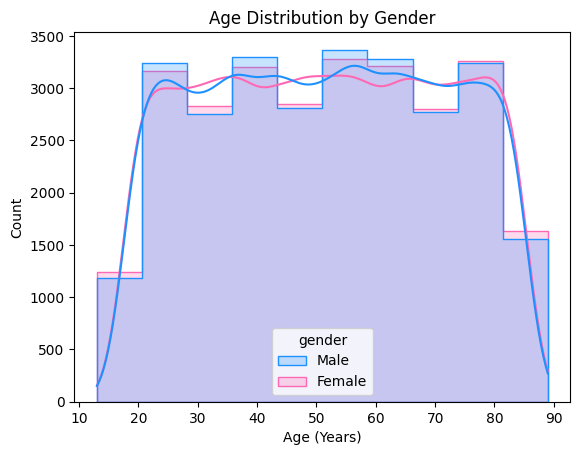

In [15]:
sns.histplot(data=df, 
             x='age', 
             kde=True, 
             hue='gender', 
             element="step", 
             palette={'Female': '#FF69B4', 'Male': '#1E90FF'},
            bins = 10)
plt.title("Age Distribution by Gender")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.show()

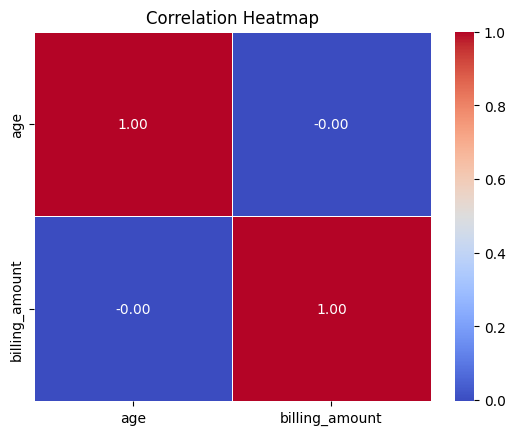

In [16]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

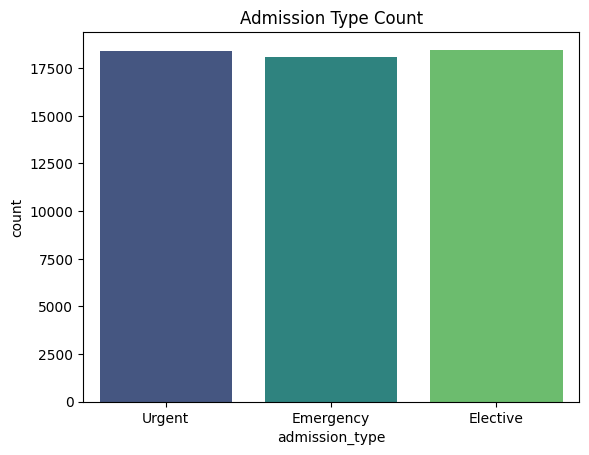

In [17]:
sns.countplot(data=df, x='admission_type', palette='viridis')
plt.title('Admission Type Count')
plt.show()

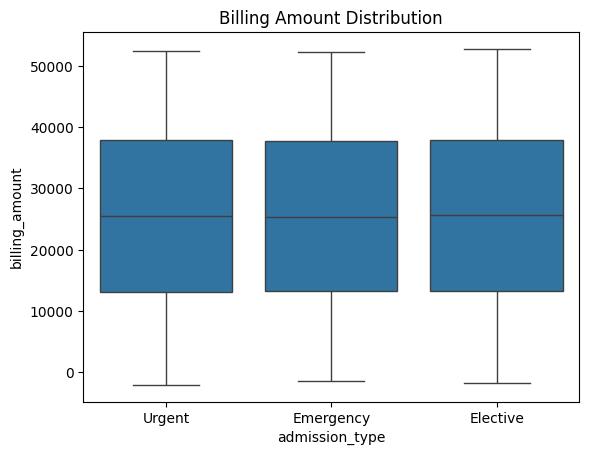

In [18]:
sns.boxplot(data=df,x='admission_type', y='billing_amount')
plt.title('Billing Amount Distribution')
plt.show()

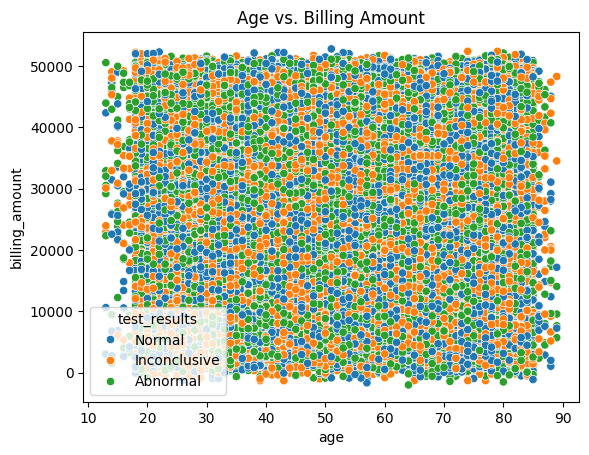

In [19]:
sns.scatterplot(data=df, x='age', y='billing_amount', hue='test_results')
plt.title('Age vs. Billing Amount')
plt.show()

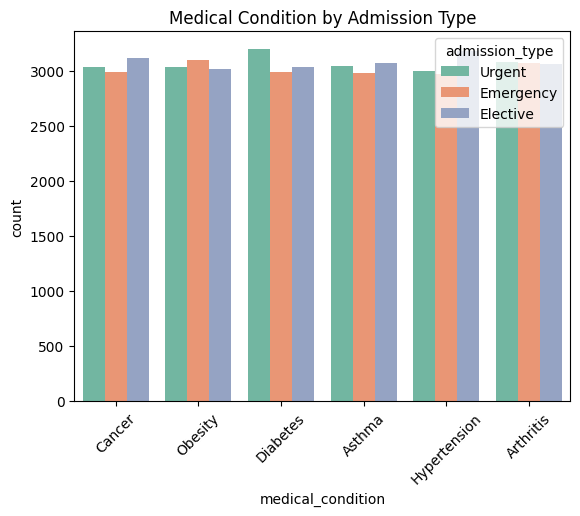

In [20]:
sns.countplot(data=df, x='medical_condition', hue='admission_type', palette='Set2')
plt.xticks(rotation=45)
plt.title('Medical Condition by Admission Type')
plt.show()

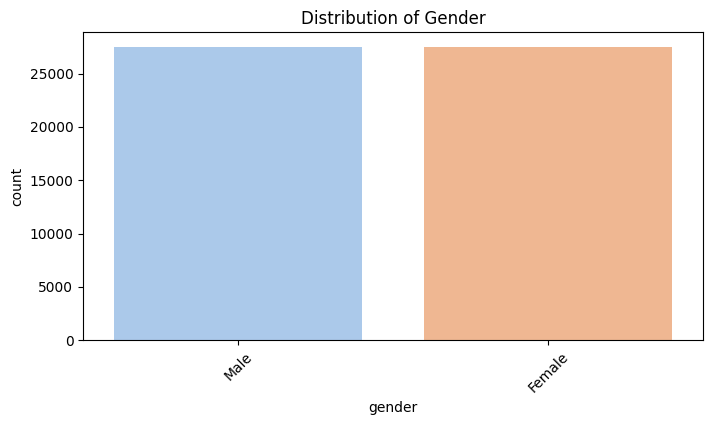

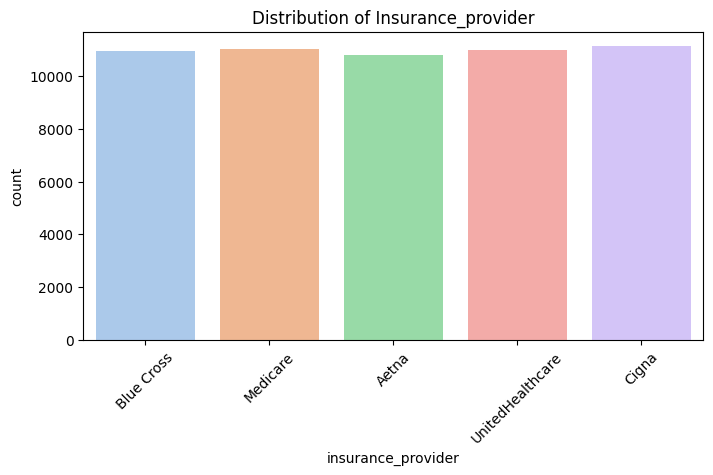

In [21]:
cat_cols = ['gender', 'insurance_provider']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

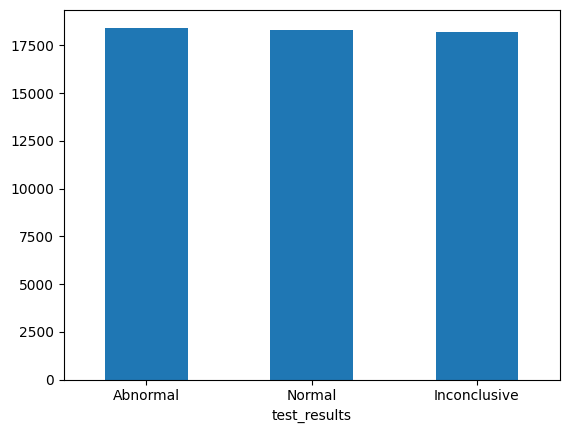

In [22]:
df['test_results'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

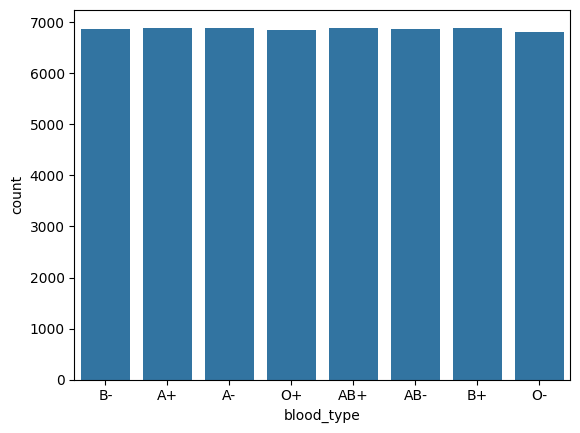

In [23]:
sns.countplot(data=df,x='blood_type')
plt.xticks(rotation=0)
plt.show()

Data Predicting

In [24]:
# Encoding categorical columns
label_cols = ['gender', 'blood_type', 'medical_condition', 'admission_type', 'insurance_provider']
df_encoded = df.copy()

for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Encode target column
df_encoded['test_results'] = le.fit_transform(df['test_results'])

# Define features and target
X = df_encoded.drop(['medication', 'test_results', 'date_of_admission', 'discharge_date'], axis=1)
y = df_encoded['test_results']

In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Define Random Forest model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 5],
    'class_weight':['balanced']
}

grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='accuracy', 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 20],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150]},
             scoring='accuracy')

Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Accuracy: 0.41586319810805894

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.43      0.42      3616
           1       0.42      0.41      0.41      3682
           2       0.41      0.41      0.41      3696

    accuracy                           0.42     10994
   macro avg       0.42      0.42      0.42     10994
weighted avg       0.42      0.42      0.42     10994



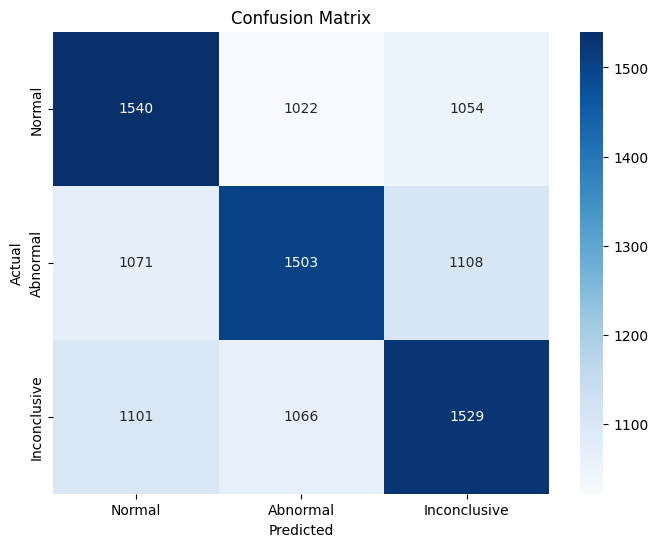

In [27]:
# Best model
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate performance
print("Best Hyperparameters:", grid_search.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', xticklabels=['Normal', 'Abnormal', 'Inconclusive'], yticklabels=['Normal', 'Abnormal', 'Inconclusive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()